# Data Preprocessing Notebook
This notebook handles data cleaning, transformation, and preparation for the heart disease prediction model.

In [1]:
#INSPECT DATA

import pandas as pd

#load dataset
df = pd.read_csv("../data/heart_disease.csv")

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,target,ca_1,ca_2,ca_3,ca_?,thal_6,thal_7,thal_?
0,63,1,1,145,233,1,2,150,0,2.3,3,0,False,False,False,False,True,False,False
1,67,1,4,160,286,0,2,108,1,1.5,2,2,False,False,True,False,False,False,False
2,67,1,4,120,229,0,2,129,1,2.6,2,1,False,True,False,False,False,True,False
3,37,1,3,130,250,0,0,187,0,3.5,3,0,False,False,False,False,False,False,False
4,41,0,2,130,204,0,2,172,0,1.4,1,0,False,False,False,False,False,False,False


In [2]:
#SCALE NUMERICAL VALUES 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(scaled_features, columns = df_encoded.columns)
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,target,ca_1,ca_2,ca_3,ca_?,thal_6,thal_7,thal_?
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.764198,-0.522599,-0.378677,-0.265841,-0.115663,3.979112,-0.793116,-0.081514
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,0.866450,-0.522599,-0.378677,3.761649,-0.115663,-0.251312,-0.793116,-0.081514
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,0.051126,-0.522599,2.640773,-0.265841,-0.115663,-0.251312,1.260850,-0.081514
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.764198,-0.522599,-0.378677,-0.265841,-0.115663,-0.251312,-0.793116,-0.081514
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.764198,-0.522599,-0.378677,-0.265841,-0.115663,-0.251312,-0.793116,-0.081514


C:\Users\malak\AppData\Local\Temp\ipykernel_15900\874141060.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


<function matplotlib.pyplot.show(close=None, block=None)>

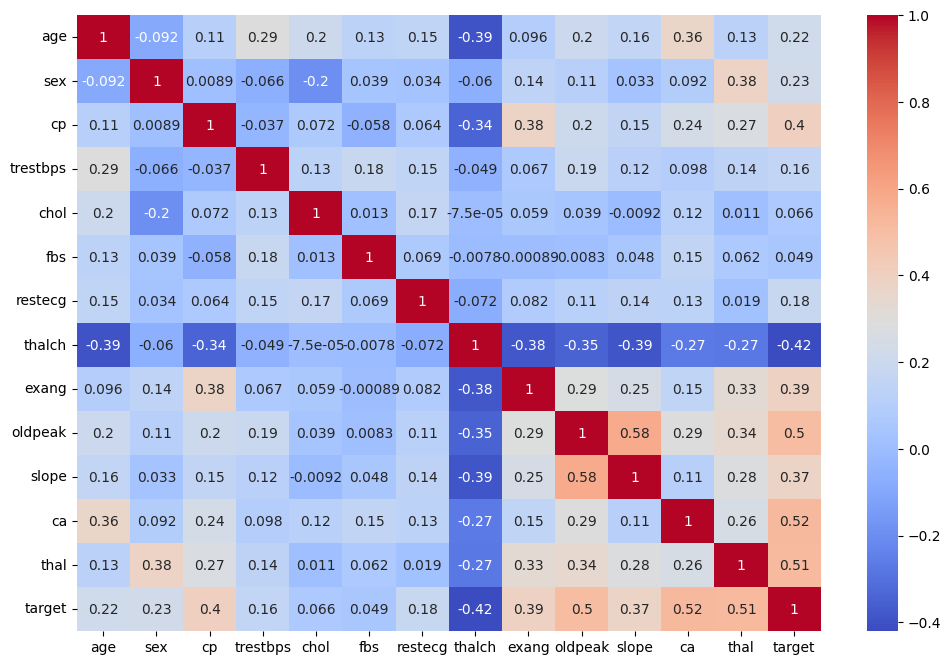

In [3]:
#EDA PLOTS

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = df.replace("?", np.nan)
df = df.apply(pd.to_numeric, errors="ignore")

df = df.dropna()

#heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show

Initial shape: (303, 14)

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Shape after dropping missing: (297, 14)

Encoded shape: (297, 14)

Scaled dataset preview:


C:\Users\malak\AppData\Local\Temp\ipykernel_15900\3336294289.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


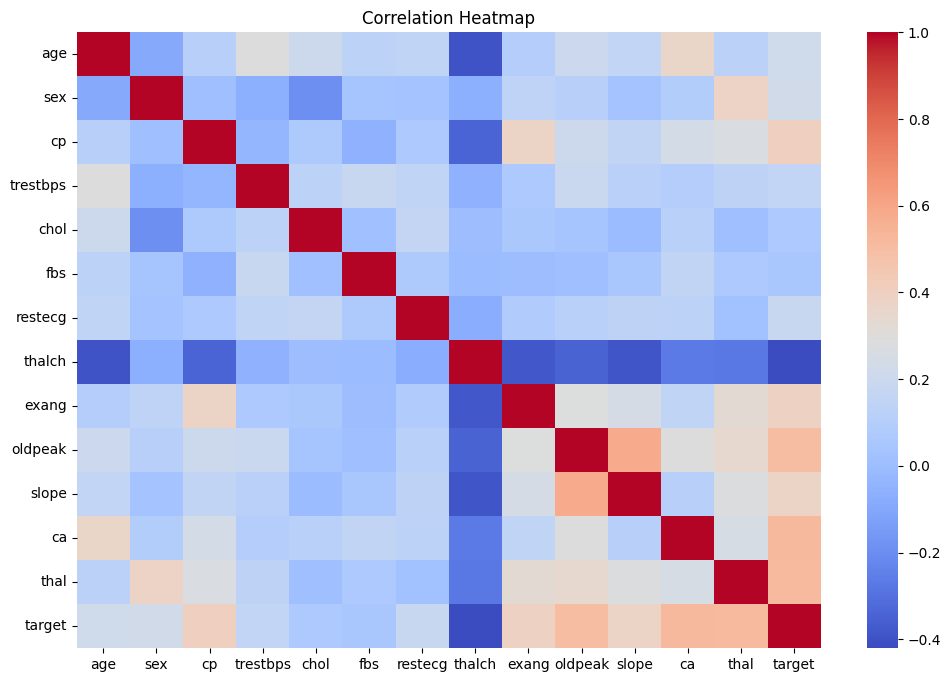

C:\Users\malak\AppData\Local\Temp\ipykernel_15900\3336294289.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette="Set2")


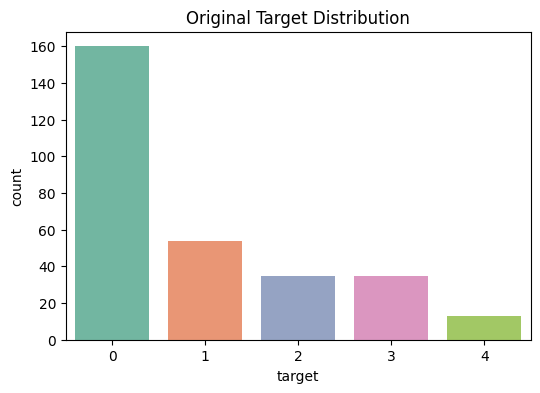

C:\Users\malak\AppData\Local\Temp\ipykernel_15900\3336294289.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_binary, palette="Set1")


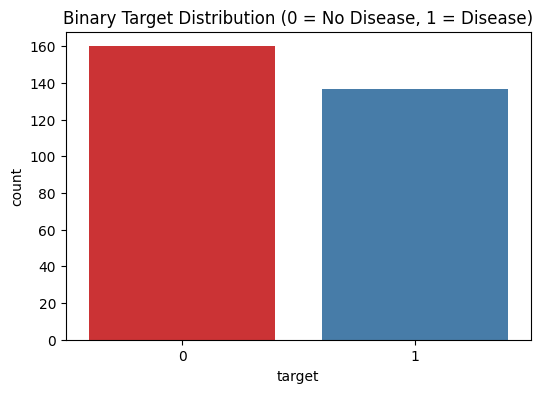

✅ Datasets saved:
- cleaned_heart_multiclass.csv (target 0–4)
- cleaned_heart_binary.csv (target 0/1)


In [4]:
# Step 1: Data Preprocessing & Cleaning

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("../data/heart_disease.csv")

print("Initial shape:", df.shape)
df.head()

# -----------------------------
# 2. Handle missing values ("?" → NaN)
# -----------------------------
df = df.replace("?", np.nan)

# Convert columns to numeric where possible
df = df.apply(pd.to_numeric, errors="ignore")

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Simple strategy: drop rows with missing values
df = df.dropna()
print("\nShape after dropping missing:", df.shape)

# -----------------------------
# 3. Encode categorical features
# -----------------------------
df_encoded = pd.get_dummies(df, drop_first=True)
print("\nEncoded shape:", df_encoded.shape)

# -----------------------------
# 4. Scale numerical features
# -----------------------------
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.columns)

print("\nScaled dataset preview:")
df_scaled.head()

# -----------------------------
# 5. Exploratory Data Analysis
# -----------------------------

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Target distribution (0-4)
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette="Set2")
plt.title("Original Target Distribution")
plt.show()

# Binary Target Distribution (0-1)
df_binary = df.copy()
df_binary['target'] = df_binary['target'].apply(lambda x: 1 if x > 0 else 0)

plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df_binary, palette="Set1")
plt.title("Binary Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()

# -----------------------------
# 6. Saved cleaned datasets
# -----------------------------

# Save the cleaned dataset (with target 0-4)
df.to_csv("../data/cleaned_heart_multiclass.csv", index=False)

# Create a binary version (0 = no disease, 1 = disease)
df_binary = df.copy()
df_binary['target'] = df_binary['target'].apply(lambda x: 1 if x > 0 else 0)

# Save the binary dataset
df_binary.to_csv("../data/cleaned_heart_binary.csv", index=False)

print("✅ Datasets saved:")
print("- cleaned_heart_multiclass.csv (target 0–4)")
print("- cleaned_heart_binary.csv (target 0/1)")